In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import cv2
import pickle
import numpy as np

In [5]:
path = '/content/drive/MyDrive/CVPR/Pickle data/'
fileObj = open( path + 'X_train', 'rb')
X_train = pickle.load(fileObj)
fileObj.close()

fileObj = open( path +'Y_train', 'rb')
Y_train = pickle.load(fileObj)
fileObj.close()

fileObj = open( path +'X_valid', 'rb')
X_valid = pickle.load(fileObj)
fileObj.close()

fileObj = open( path +'Y_valid', 'rb')
Y_valid = pickle.load(fileObj)
fileObj.close()

fileObj = open( path +'X_test', 'rb')
X_test = pickle.load(fileObj)
fileObj.close()

fileObj = open( path +'Y_test', 'rb')
Y_test = pickle.load(fileObj)
fileObj.close()

In [6]:
print(X_train.shape)
print(Y_train.shape)
print(X_valid.shape)
print(Y_valid.shape)
print(X_test.shape)
print(Y_test.shape)

(10000, 100, 100, 3)
(10000,)
(800, 100, 100, 3)
(800,)
(992, 100, 100, 3)
(992,)


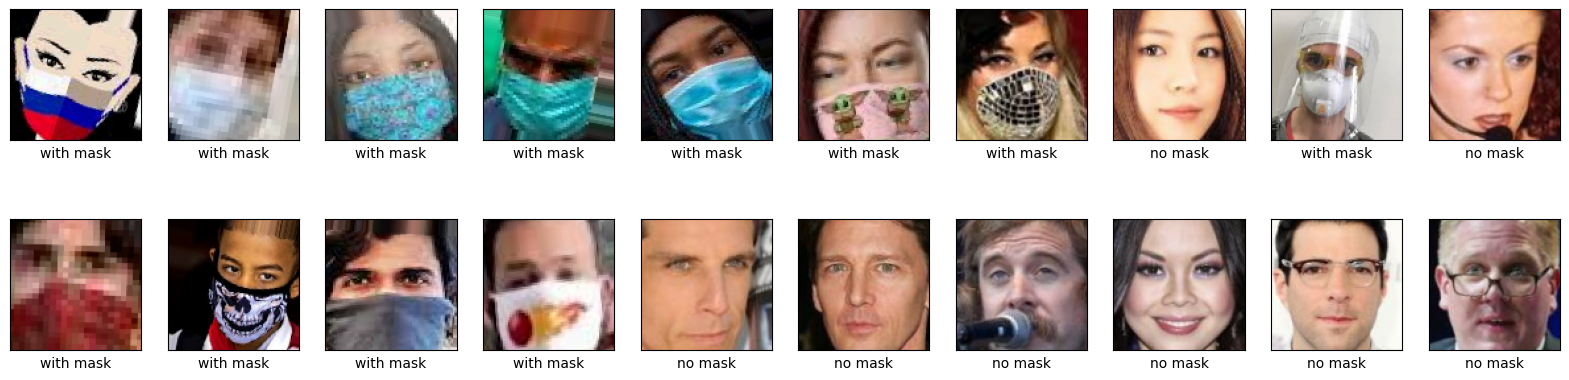

In [7]:

plt.figure(figsize=(20,5))
for i in range(20):
  plt.subplot(2, 10, i+1)
  plt.imshow(X_train[i].astype('uint8'))
  plt.xlabel("with mask" if Y_train[i]==0 else "no mask")
  plt.xticks([])
  plt.yticks([])
plt.show()

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
model = keras.Sequential([
    keras.Input(shape=X_train.shape[1:]),
    layers.Conv2D(filters=32, kernel_size=(11,11),strides=(4,4), padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(5,5),strides=(1,1), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=128, kernel_size=(3,3),strides=(1,1), padding='same', activation='relu'),
    layers.BatchNormalization(),

    layers.Conv2D(filters=128, kernel_size=(3,3),strides=(1,1), padding='same', activation='relu'),
    layers.BatchNormalization(),

    layers.Conv2D(filters=512, kernel_size=(3,3),strides=(1,1), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.BatchNormalization(),

    layers.Flatten(),

    layers.Dense(units=1024, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(units=1024, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(units=1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 23, 23, 32)        11648     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 11, 11, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                        

In [10]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    loss=tf.keras.losses.binary_crossentropy,
    metrics=['accuracy']
)

In [11]:
h = model.fit(x=X_train, y=Y_train, epochs=50, batch_size=128, validation_data=(X_valid, Y_valid))

Epoch 1/50
79/79 [==============================] - 19s 35ms/step - loss: 0.5471 - accuracy: 0.7335 - val_loss: 0.5880 - val_accuracy: 0.7738
Epoch 2/50
79/79 [==============================] - 3s 41ms/step - loss: 0.3403 - accuracy: 0.8553 - val_loss: 0.4176 - val_accuracy: 0.8712
Epoch 3/50
79/79 [==============================] - 3s 34ms/step - loss: 0.2738 - accuracy: 0.8874 - val_loss: 0.2835 - val_accuracy: 0.8975
Epoch 4/50
79/79 [==============================] - 2s 27ms/step - loss: 0.2320 - accuracy: 0.9040 - val_loss: 0.2077 - val_accuracy: 0.9175
Epoch 5/50
79/79 [==============================] - 3s 33ms/step - loss: 0.2024 - accuracy: 0.9195 - val_loss: 0.1691 - val_accuracy: 0.9325
Epoch 6/50
79/79 [==============================] - 3s 36ms/step - loss: 0.1812 - accuracy: 0.9292 - val_loss: 0.1487 - val_accuracy: 0.9475
Epoch 7/50
79/79 [==============================] - 2s 28ms/step - loss: 0.1616 - accuracy: 0.9368 - val_loss: 0.1383 - val_accuracy: 0.9500
Epoch 8/50
7

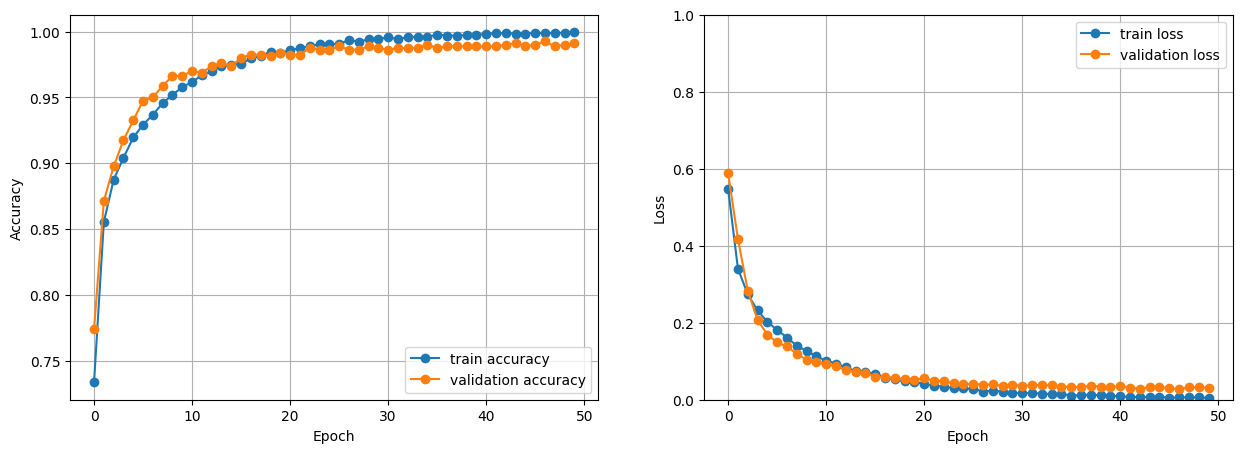

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [13]:
model.evaluate(X_test, Y_test)

31/31 [==============================] - 0s 6ms/step - loss: 0.0463 - accuracy: 0.9879


[0.046340666711330414, 0.9879032373428345]

In [14]:
predictions = model.predict(X_test)

31/31 [==============================] - 0s 4ms/step


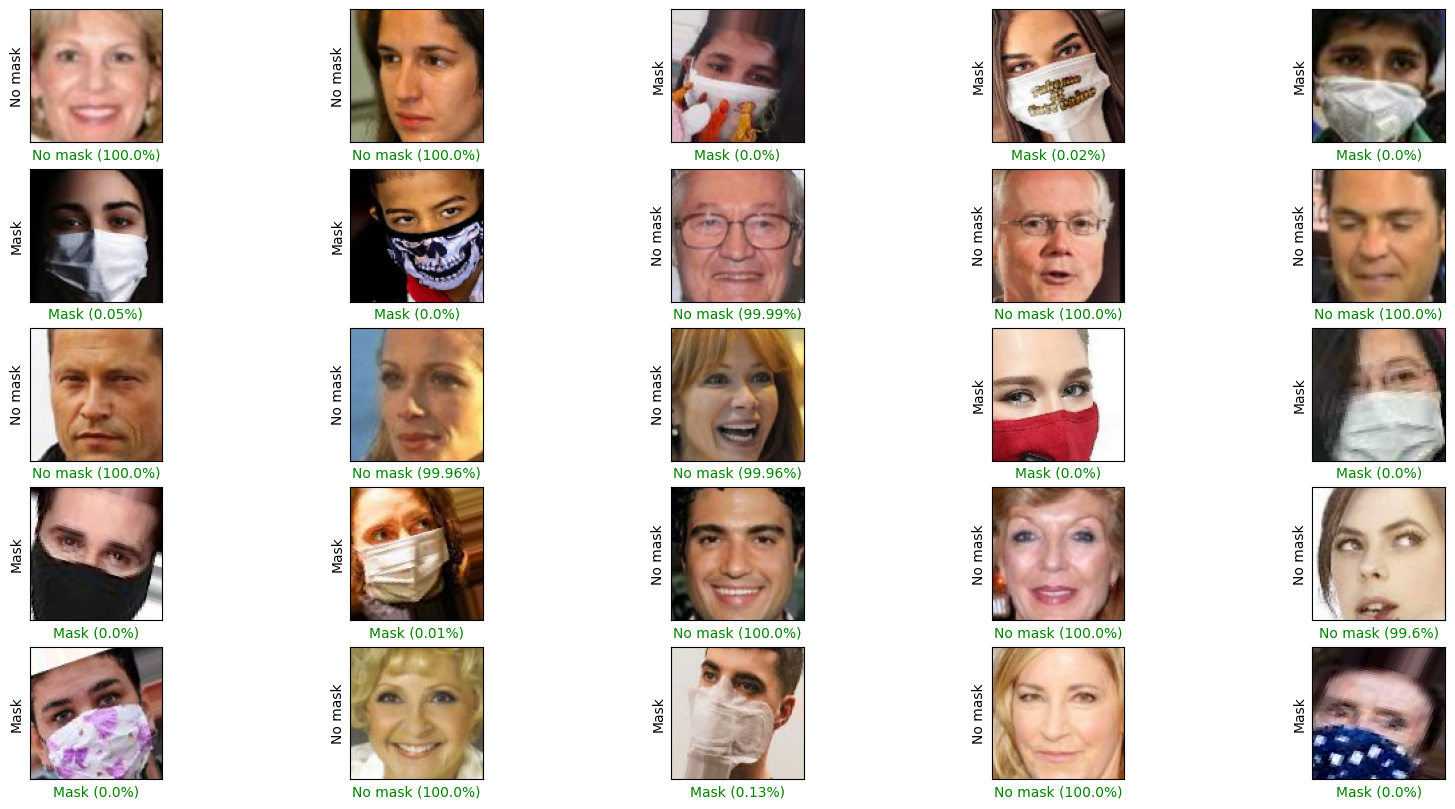

In [34]:
rows = 5
cols = 5
categories = ['Mask', 'No mask']
plt.figure(figsize=(20,10))
for i in range(25):

    plt.subplot(rows, cols, i+1)
    plt.imshow(X_test[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(categories[Y_test[i]])
    c = np.round(predictions[i][0]).astype('uint8')
    label = categories[c]+" ("+str(np.round(predictions[i][0]*100, 2))+"%)"
    if Y_test[i] == c:
        plt.xlabel(label, color='g')
    else:
        plt.xlabel(label, color='r')


plt.show()

In [36]:
model.save('/content/drive/MyDrive/CVPR/my_model.h5')